## Numerical Integration of Fourier Coefficients

In this part you will calculate the Fourier coefficients by numerically evaluating the integrals:

$$
a_n={1\over L}\int_{-L}^L f(x)\cos\left({n\pi x\over L}\right)dx\qquad (n=0,1,2,\dots)
$$

$$
b_n={1\over L}\int_{-L}^L f(x)\sin\left({n\pi x\over L}\right)dx\qquad (n=1,2,\dots)
$$

To see how to do this, recall that we already have discretized the $x$-coordinate, with a spacing $\Delta x.$ To get an approximation to the area under some function $g(x)$, just calucate the area of a bunch of rectangles of width 
$\Delta x$ and height $g(x)$, and add them up:

$$
\int_a^b g(x)dx\approx\sum_i g(x_i)\Delta x
$$

where the sum runs over the different $x$ values. This should be a decent approximation as long as $\Delta x$ is sufficiently small. However, a better approximation would be to use the average of the integrand at the left and right edges of the interval, so you get a rectangle with an intermediate height. Then the missing bit tends to get compensated by an extra bit. This approach is known as the trapezoid rule.

It is probably wise to make sure you understand how the trapezoid rule works by using it to calculate an integral you already know, such as (for example)

$$
\int_{-1}^1 (x+x^2)dx
$$

which you can easily check is equal to $2/3$. Do this in the cell below. Some of the code is already in place for you.

In [1]:
#PHYS 2200 Fall 2019 "Fill in blanks" code
#Shows 
#Adjust variable "n" to adjust how many masses animation shows.
#Meant to be open with Andaconda Navigator's Jupyter Notebook(.ipynb)

from numpy import *
import matplotlib.pyplot as plt

# Number of grid points:
n = 100

# We will calculate the integral from a to b:
a = -1
b = 1

# Here is the function to be integrated:
def g(x):
    return (x + x**2)

# Set up array of x values:
x = linspace(a, b, n)

# This is the spacing:
dx = x[1] - x[0]

# First, do the integral using left rectangles.
width = (b-a)/n

# Note that we omit the last term, as this would count a rectangle past the end of the range we want.
# That this is correct can be seen by calculating the integral of a constant function, for which this
# rectangle approach should be exactly correct. Try it!
summ = 0
#summ2 = 0
for i in range(n-1):
    summ += g(x[i])*dx
#   summ2 += g(x[i])*width
    
print("Result using left rectangles is:", summ)

# Then do it using the trapezoid rule:
trap = 0

# ADD YOUR CODE HERE:
for i in range(n-1):
    trap += ((dx)*( g(x[i]) + g(x[i+1]) ))/2

print("Result using trapezoid rule is: ", trap)

Result using left rectangles is: 0.6466006870047284
Result using trapezoid rule is:  0.6668027072067484


Once this is working to your satisfaction, you should copy your code from the notebook with homework plots into the cell below. Then modify the calculation of the $a$ and $b$ coefficients to use the above formulas with the trapezoid rule. Use this to expand the function

$$
f(x)=x\cos(x)+\sqrt{|x|}
$$

on the interval $-2\leq x \leq2$, which, needless to say, would be difficult analytically :-). Plot the sum of the first 30 terms in the Fourier series, along with $f(x)$ itself.

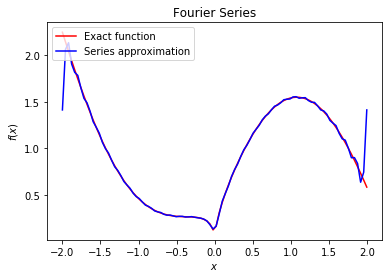

In [2]:
from numpy import *
import matplotlib.pyplot as plt

# Number of grid points:
n = 100

# The expansion interval (runs from -L to L):
L = 2

# Number of terms in Fourier series to keep:
n_terms = 30

# The exact function being expanded (just for plotting):
def f(x):
    return x * cos(x) + sqrt(abs(x))

# Set up arrays:
x_min = -L
x_max = L

x = linspace(x_min, x_max, n)

f_exact = ndarray(n)

for i in range(n):
    f_exact[i] = f(x[i])

f_series = zeros(n)

# Coefficients for cosine terms:
a = zeros(n_terms)

# Coefficients for sine terms:
b = zeros(n_terms)

# Calculate the a's -- ADD YOUR CODE HERE:
for i in range(n_terms):
    for j in range (n-1):
        a[i] += ((dx)*( f(x[j])*cos((i*pi*x[j])/L) + f(x[j+1]) * cos((i*pi*x[j+1])/L) ))/2
        
        
# Calculate the b's -- ADD YOUR CODE HERE:
for i in range(n_terms):
    for j in range (n-1):
        b[i] += ((dx)*( f(x[j])*sin((i*pi*x[j])/L) + f(x[j+1]) * sin((i*pi*x[j+1])/L) ))/2

    
    
# Now sum the series:
for i in range(n):
    f_series[i] = 0.5*a[0]
    for j in range(1, n_terms):
        f_series[i] += a[j]*cos(j*pi*x[i]/L) + b[j]*sin(j*pi*x[i]/L)

# Draw the plots:
plt.plot(x, f_exact, color='red', label='Exact function')
plt.plot(x, f_series, color='blue', label='Series approximation')

plt.title('Fourier Series')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend(loc='upper left')

plt.show()